<hr style="height: 1px;">
<i>This code was authored by Alex Shvonski, Copyright 2020 MIT All Rights Reserved.</i>
<hr style="height: 1px;">

<h2>Initializing the program</h2>

<font size="3">To initialize the visualization, you may need to click "Run all initialization cells" above (see button location in figure).</font>

<img src="img/binder_initialize_button.png" alt="Drawing" style="width: 700px;" align="left"/>

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<font size="3">You should see the visualization <i>directly below this line</i>, before the next section.</font>

<br/>
<br/>
<hr style="height: 1px;">

In [6]:
#This code was authored by Alex Shvonski, Copyright 2020 MIT All Rights Reserved.

%matplotlib notebook
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, interactive, interactive_output, fixed, IntSlider, HBox, Layout, Output, VBox
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from math import pi

In [7]:
#Define functions
###############################################
###############################################
def func1(t):
    result = (abs((t%1)-0.25) < 0.25).astype(float) - (abs((t%1)-0.75) < 0.25).astype(float)
    return result

def func2(t):
    result = t % 1
    return result

def func3(t):
    result = 4*((t%1)-0.5)**2
    return result

In [8]:
#Define Fourier coefficients
###############################################
###############################################
def a0(func,t):
    #this approximates integration
    c = func(t)
    return 2.*c.sum()/c.size

def an(func,t,n):
    #this approximates integration
    T = 1.
    c = func(t)*np.cos(2.*n*pi*t/T)
    return 2.*c.sum()/c.size

def bn(func,t,n):
    #this approximates integration
    T = 1.
    c = func(t)*np.sin(2.*n*pi*t/T)
    return 2.*c.sum()/c.size

def fourier_series_2(func,t,Nh):
    #Nh=Nh+1
    T = 1.
    f = np.zeros((Nh+1,len(t)))
            
    if Nh==0:
        result = 0.5*a0(func,t)*np.ones(len(t))

    if Nh>0:
        f[0] = 0.5*a0(func,t)*np.ones(len(t))
        for i in np.arange(1,Nh+1,1):    
            f[i] = an(func,t,i)*np.cos(2.*(i)*pi*t/T) + bn(func,t,i)*np.sin(2.*(i)*pi*t/T)
        
        result = np.sum(f.real,axis=0)
    
    return result
    

def nth_cos_term(func,t,n):
    T = 1.
    f = an(func,t,n)*np.cos(2.*n*pi*t/T)
    return f

def nth_sin_term(func,t,n):
    T = 1.
    f = bn(func,t,n)*np.sin(2.*n*pi*t/T)
    return f


<IPython.core.display.Javascript object>


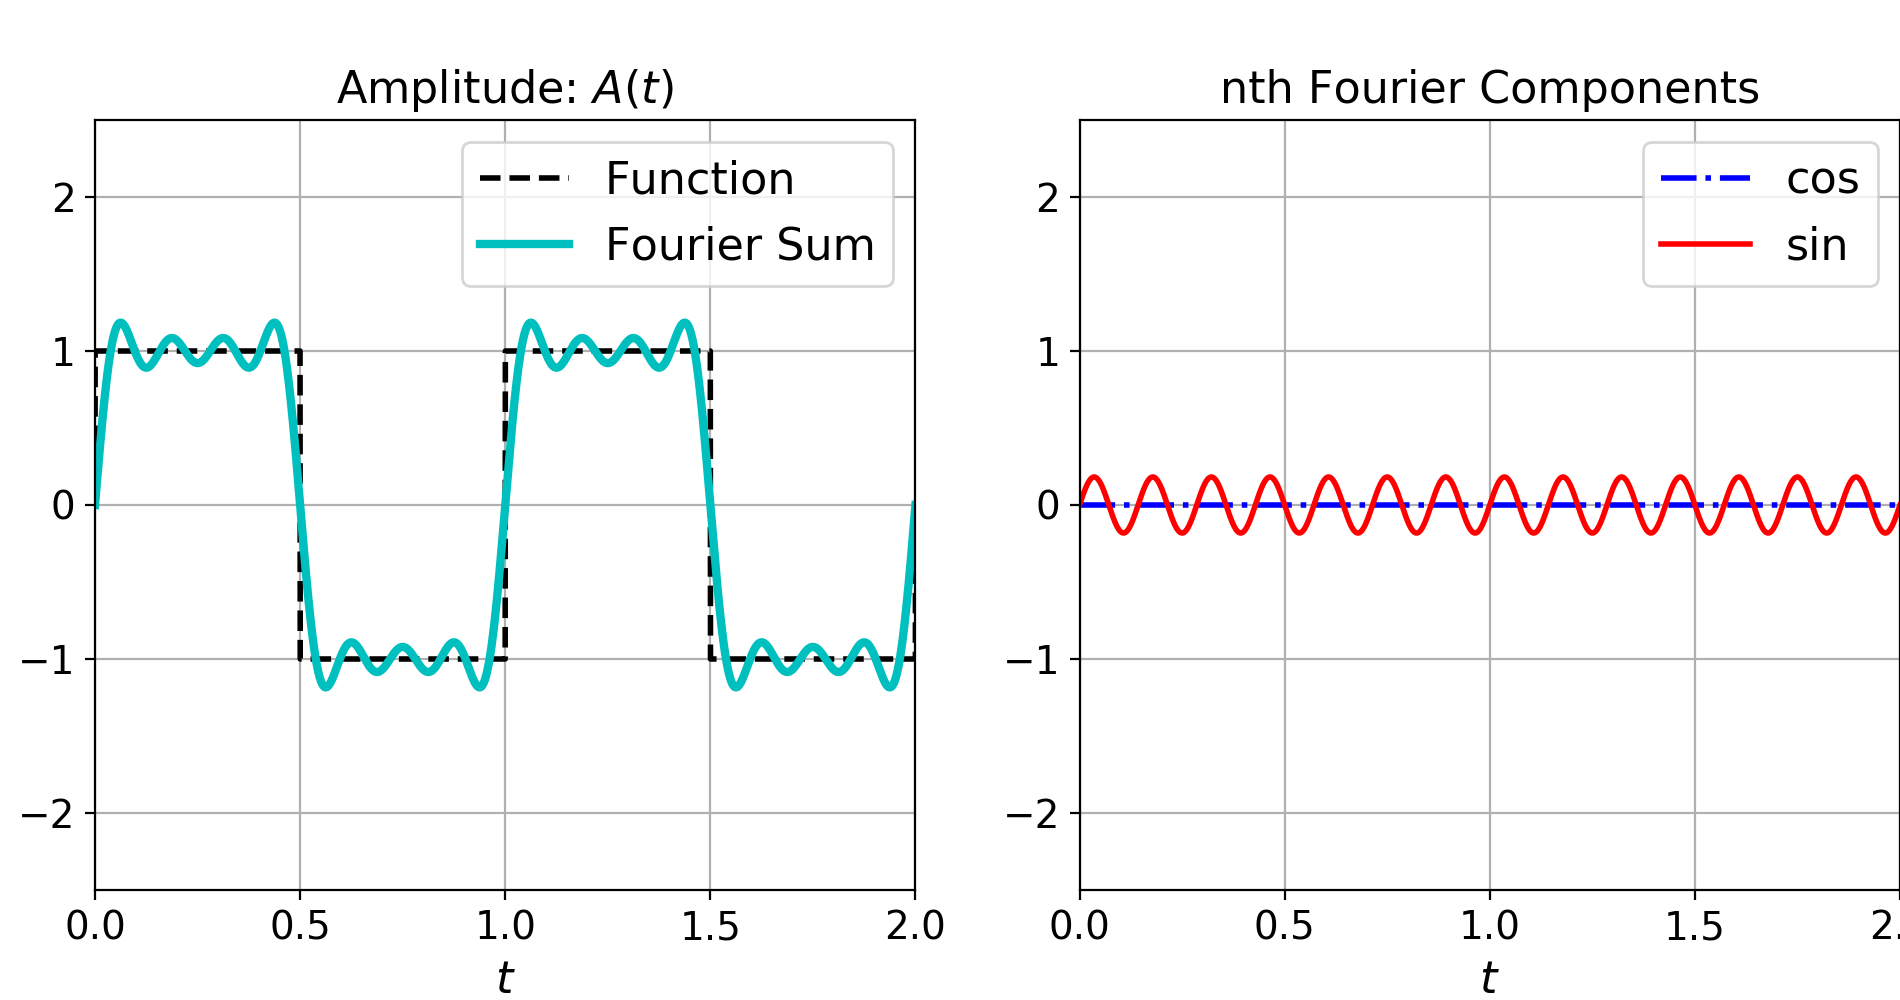

In [9]:
#Define plot
###############################################
###############################################
fig, ax = plt.subplots(1, 2, figsize=(9.5, 5))
plt.subplots_adjust(left=0.05, bottom=None, right=1, top=None, wspace=None, hspace=1.)
t = np.linspace(0., 2., 10000)
func=func1
Nh=5
#############################
#plot1
y_max = max(func(t))*2.5

line_1, = ax[0].plot(t, func(t),
                     'k--', lw=2, label="Function")

line_2, = ax[0].plot(t, fourier_series_2(func,t,Nh),
                    'c-', lw=3, label="Fourier Sum")

#plot params
ax[0].set_title('Amplitude: $A(t)$', fontsize=16)
ax[0].set_xlabel('$t$', fontsize=16)
ax[0].set_ylim(-y_max,y_max)
ax[0].set_xlim(min(t),max(t))
ax[0].grid(True)
ax[0].legend(loc=1, fontsize=16)
ax[0].xaxis.set_major_locator(MultipleLocator(0.5))
plt.setp(ax[0].get_xticklabels(), fontsize=14)
plt.setp(ax[0].get_yticklabels(), fontsize=14)


#############################
#plot2
#y_max = max(amplitude(w,w0,gamma,f0))*1.3

#plot blue for odd, red for even (green zero)
#if Nh == 0:
#    line_3, = ax[1].plot(t, 0.5*a0(func,t)*np.ones(len(t)),
#                'g-', lw=2, label="zeroth term")


#if Nh > 0:       
line_3, = ax[1].plot(t, nth_cos_term(func,t,Nh),
                     'b-.', lw=2, label="cos")
line_4, = ax[1].plot(t, nth_sin_term(func,t,Nh),
                     'r-', lw=2, label="sin")

#plot params
ax[1].set_title('nth Fourier Components', fontsize=16)
ax[1].set_xlabel('$t$', fontsize=16)
ax[1].set_ylim(-y_max,y_max)
ax[1].set_xlim(min(t),max(t))
ax[1].grid(True)
ax[1].legend(loc=1, fontsize=16)
ax[1].xaxis.set_major_locator(MultipleLocator(0.5))
plt.setp(ax[1].get_xticklabels(), fontsize=14)
plt.setp(ax[1].get_yticklabels(), fontsize=14)


#Define plot updater
###############################################
###############################################
def update(func,Nh):
    #plot1
    #############################
    line_1.set_ydata(func(t))
    
    line_2.set_ydata(fourier_series_2(func,t,Nh))
         
    #plot2
    #############################
    if Nh == 0:
        line_3.set_ydata(0.5*a0(func,t)*np.ones(len(t)))
        line_4.set_ydata(np.zeros(len(t)))

    if Nh > 0:       
        line_3.set_ydata(nth_cos_term(func,t,Nh))
        line_4.set_ydata(nth_sin_term(func,t,Nh))
    
    fig.canvas.draw_idle()
    return


#Define control elements
###############################################
###############################################
s1=widgets.Dropdown(
    options=[('square wave', func1), ('saw-tooth', func2), ('parabola', func3)],
    value=func1,
    description='Function:')

s2=widgets.IntSlider(
    min=0,
    max=20,
    step=1,
    value=7,
    layout=Layout(width='600px'),
    description='Number of Fourier terms: $n=$',
    style = {'description_width': 'initial'})


#Connect controls to plot
###############################################
###############################################
out = interactive_output(update, {'func': s1, 'Nh': s2})


#Set layout
###############################################
###############################################
box_layout = Layout(display='flex', flex_flow='row', justify_content='space-between', align_items='center')


#Display output
###############################################
###############################################
d = display(HBox([s1, s2], layout=box_layout))

<hr style="height: 1px;">

<h2>About the Visualization</h2>

<font size="3">These plots show the Fourier series approximation of different functions. One can select a function, which is shown as a dashed line in Plot 1 (left), and generate a Fourier series of the function (shown as cyan line in Plot 1) by setting the number of terms to include in the series. In Plot 2 (right) the amplitude of each term is shown (for both $\sin$ and $\cos$ terms).
</font>


<br/>
<font size="3">
<b>Plot 1 (left):</b>
<ul>
    <li>(dashed black line) the function that is chosen to be approximated.</li>
    <li>(cyan line) the sum $n$ terms in the Fourier series approximation (where $n$ is chosen by the user).</li>
</ul>
    
    
<br/>
<b>Plot 2 (right):</b>
<ul>
    <li>(blue dot-dashed line) the $n^\mathrm{th}$ cosine term in the Fourier series</li>
    <li>(red line) the $n^\mathrm{th}$ sine term in the Fourier series</li>
</ul>
  
  
<br/>
<b>Drop-down and Sliders:</b>
<ul>
    <li>Drop-down: select the function to be approximated</li>
    <li>Slider: choose the number of terms to include in the Fourier series; the amplitude of the $n^\mathrm{th}$ cosine and sine terms will be displayed in Plot 2.</li>
</ul>
</font>
<br/>

<hr style="height: 1px;">

<h2>Exploration</h2>

<font size="3">Consider the following questions and possible actions:
<ul>
    <li>How does the Fourier series approximation change when you include more terms?</li>
    <li>Which functions have only cosine or sine terms?</li>
    <li>Which functions have only odd or even terms?</li>
</ul>      
</font>

<br/>

<hr style="height: 1px;">

<h2>Viewing the Code</h2>
<br/>
<font size="3">You are encouraged to click the button below to view the source code. You can alter the code and rerun it within this notebook, or download the notebook itself and run the code locally on your own machine.</font>

In [10]:
#The code in this block includes content from StackOverFlow User: harshil (CC BY-SA 4.0)
#and can be found here: https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
###############################################
###############################################
#Enable hidden code
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
